In [4]:
# Installing pytesseract

!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (3,083 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

--2024-11-22 15:27:17--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.34, 3.5.246.110, 3.5.246.132, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.34|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-22 15:27:18 ERROR 404: Not Found.

unzip:  cannot find or open OCRSamples.zip, OCRSamples.zip.zip or OCRSamples.zip.ZIP.


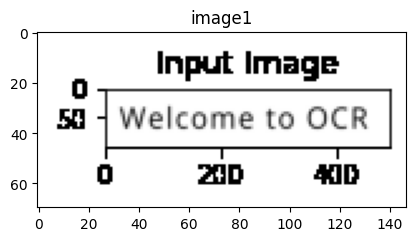

Input Image

 

Welcome to OCR

 

 

2px

 



In [3]:
image1 = cv2.imread('/content/image1.png')
imshow('image1', image1)

# running the image through pytesseract
output_txt = pytesseract.image_to_string(image1)
print(output_txt)

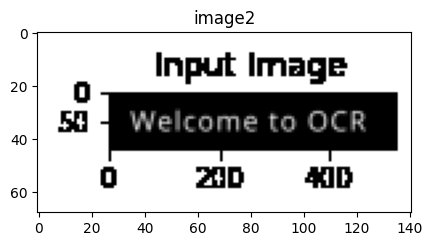

PyTesseract Extracted: Input Image

 

2D



In [6]:
image2 = cv2.imread('/content/image2.png')
imshow('image2', image2)

# run through OCR
output_txt = pytesseract.image_to_string(image2)
print("PyTesseract Extracted: {}".format(output_txt))

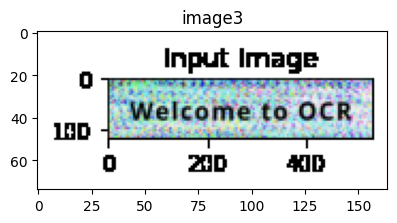

PyTesseract Extracted: Input Image

 



In [9]:
image3 = cv2.imread('/content/image3.png')
imshow('image3', image3)

# run through OCR
output_txt = pytesseract.image_to_string(image3)
print("PyTesseract Extracted: {}".format(output_txt))

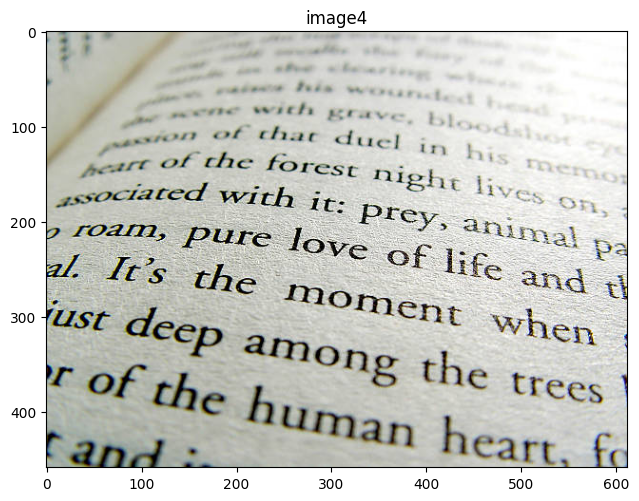

PyTesseract Extracted: CS

a * bes
f

re with pray
ee sti e duel ix, |
ae of the forest
pe

Nighy live. On
zsoctated With jr. Prey, aRimal ._
PIE PUTS oy, Of Lit. and 4
al 108 the Moment When |
ust deep am

ng the trees |

T Of the human heart.

Neil >



In [11]:
image4 = cv2.imread('/content/image4.jpg')
imshow('image4', image4)

# run through OCR
output_txt = pytesseract.image_to_string(image4)
print("PyTesseract Extracted: {}".format(output_txt))

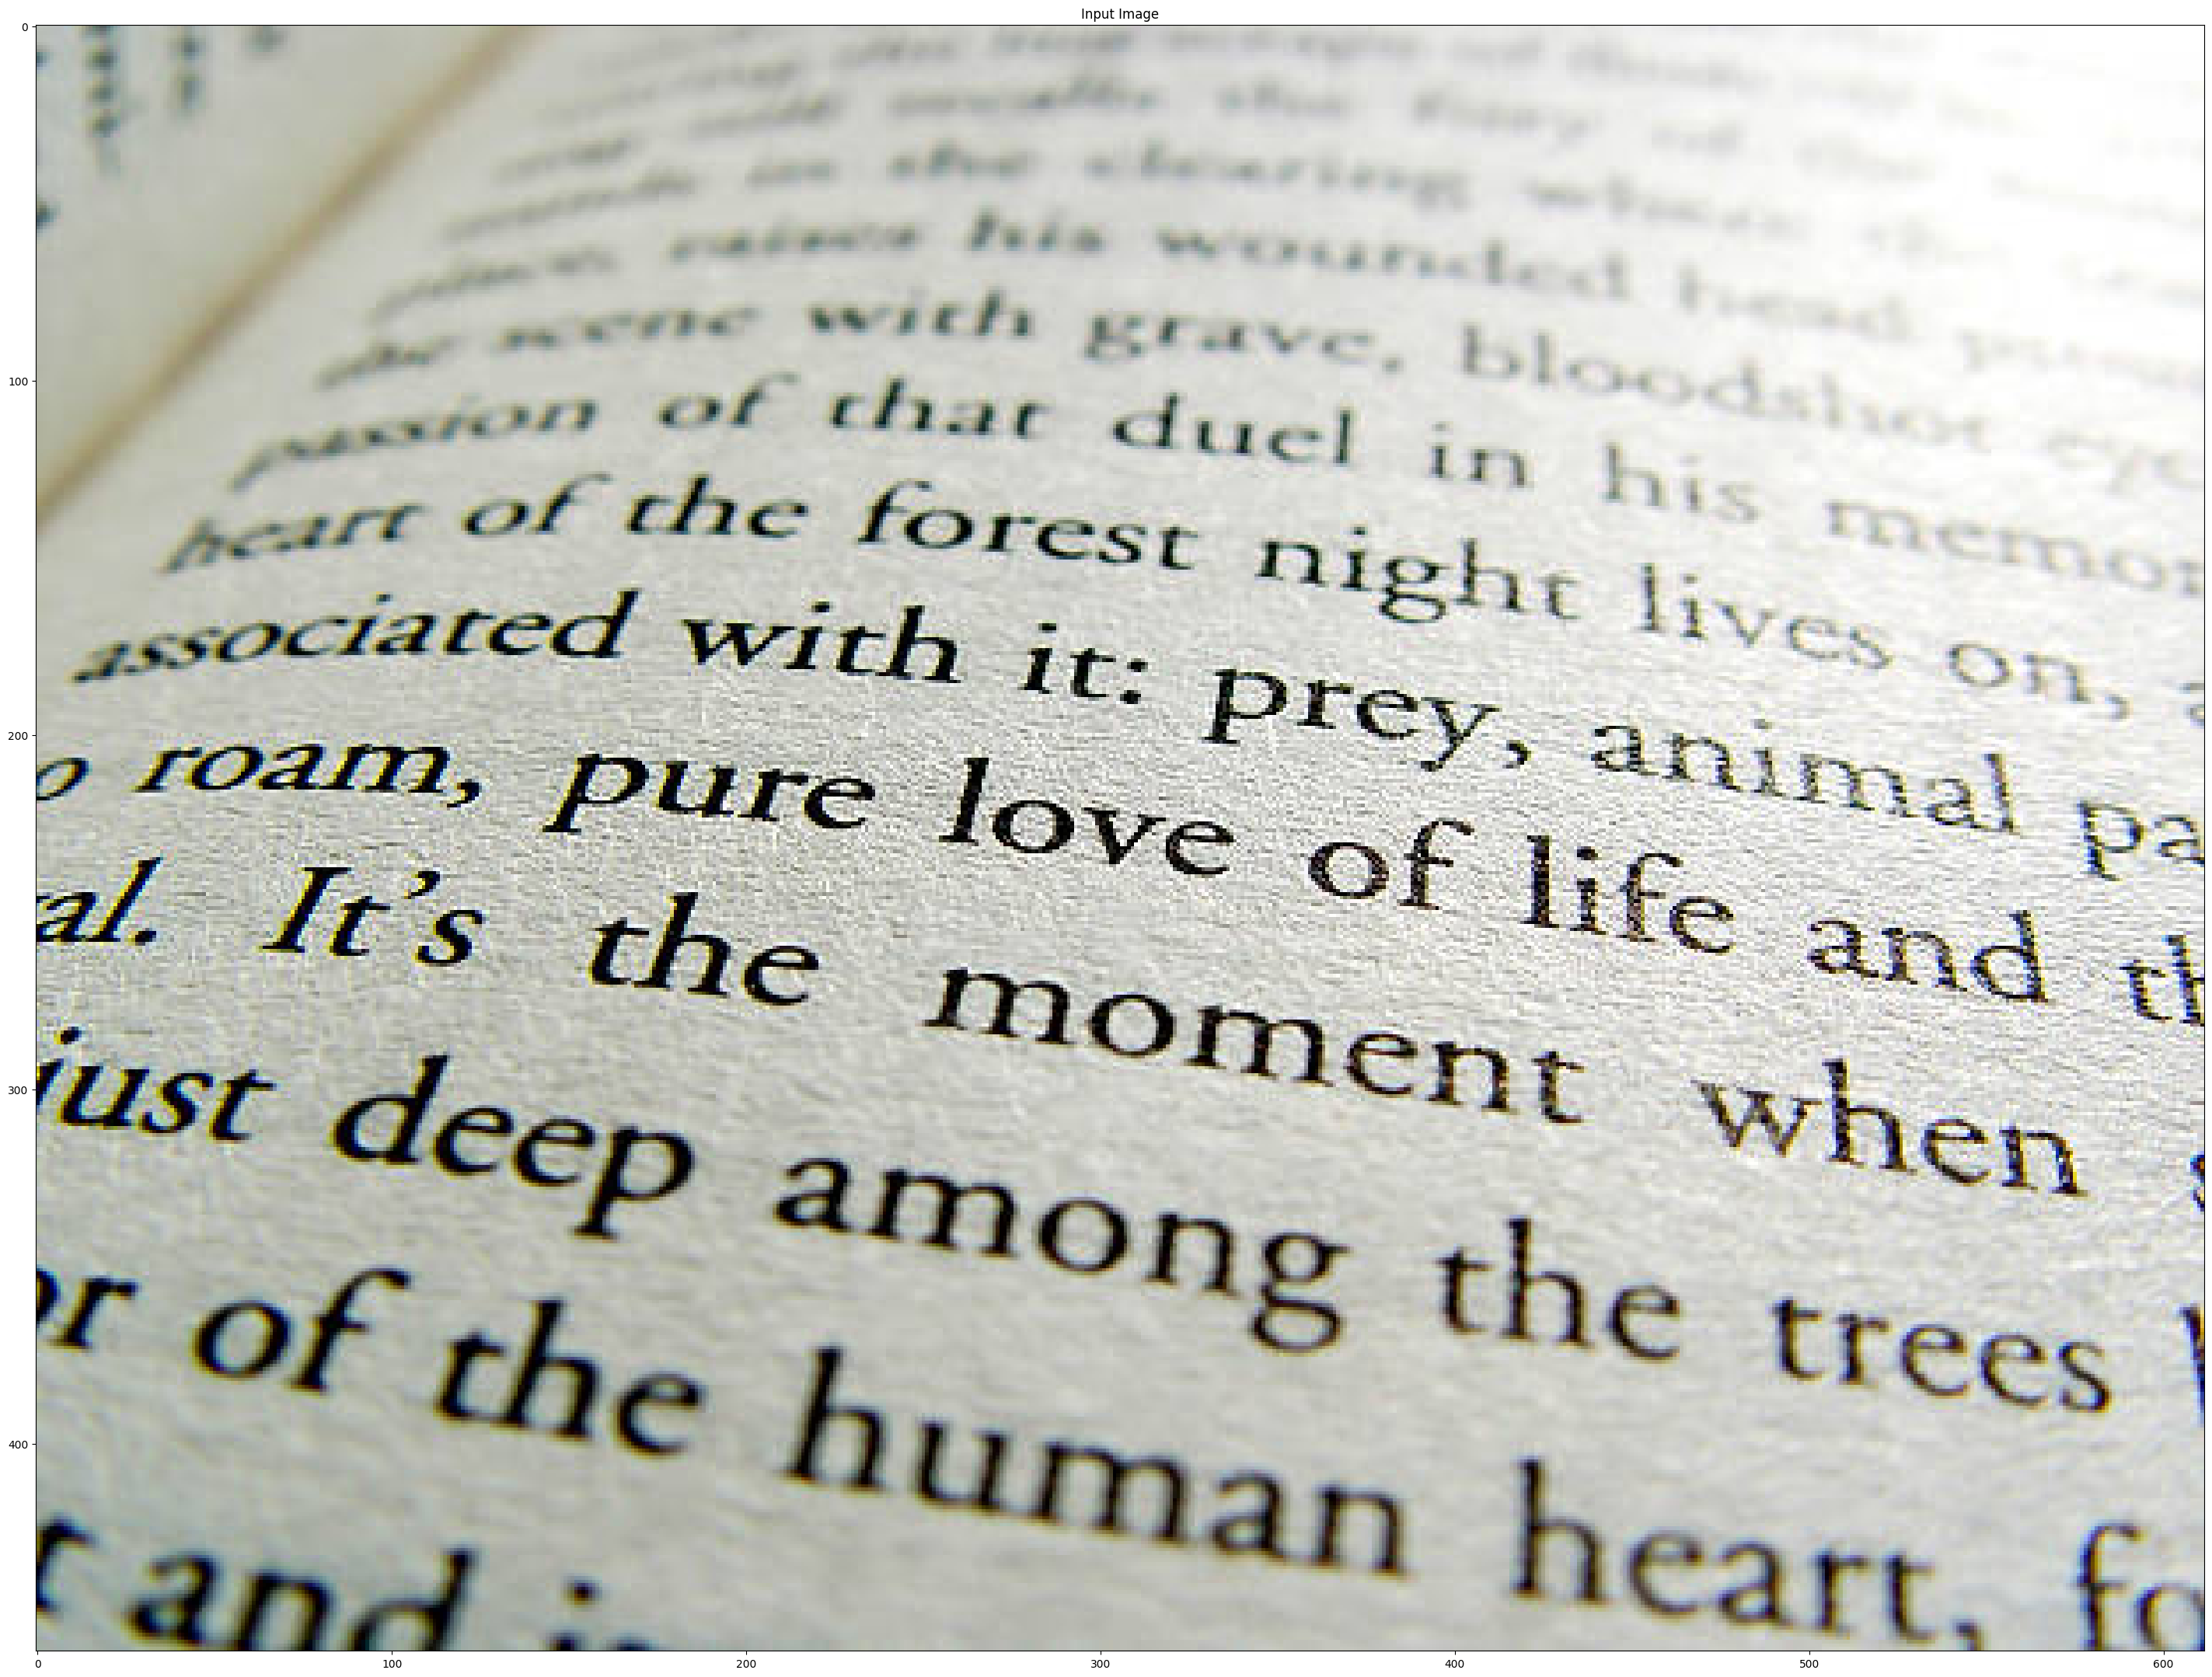

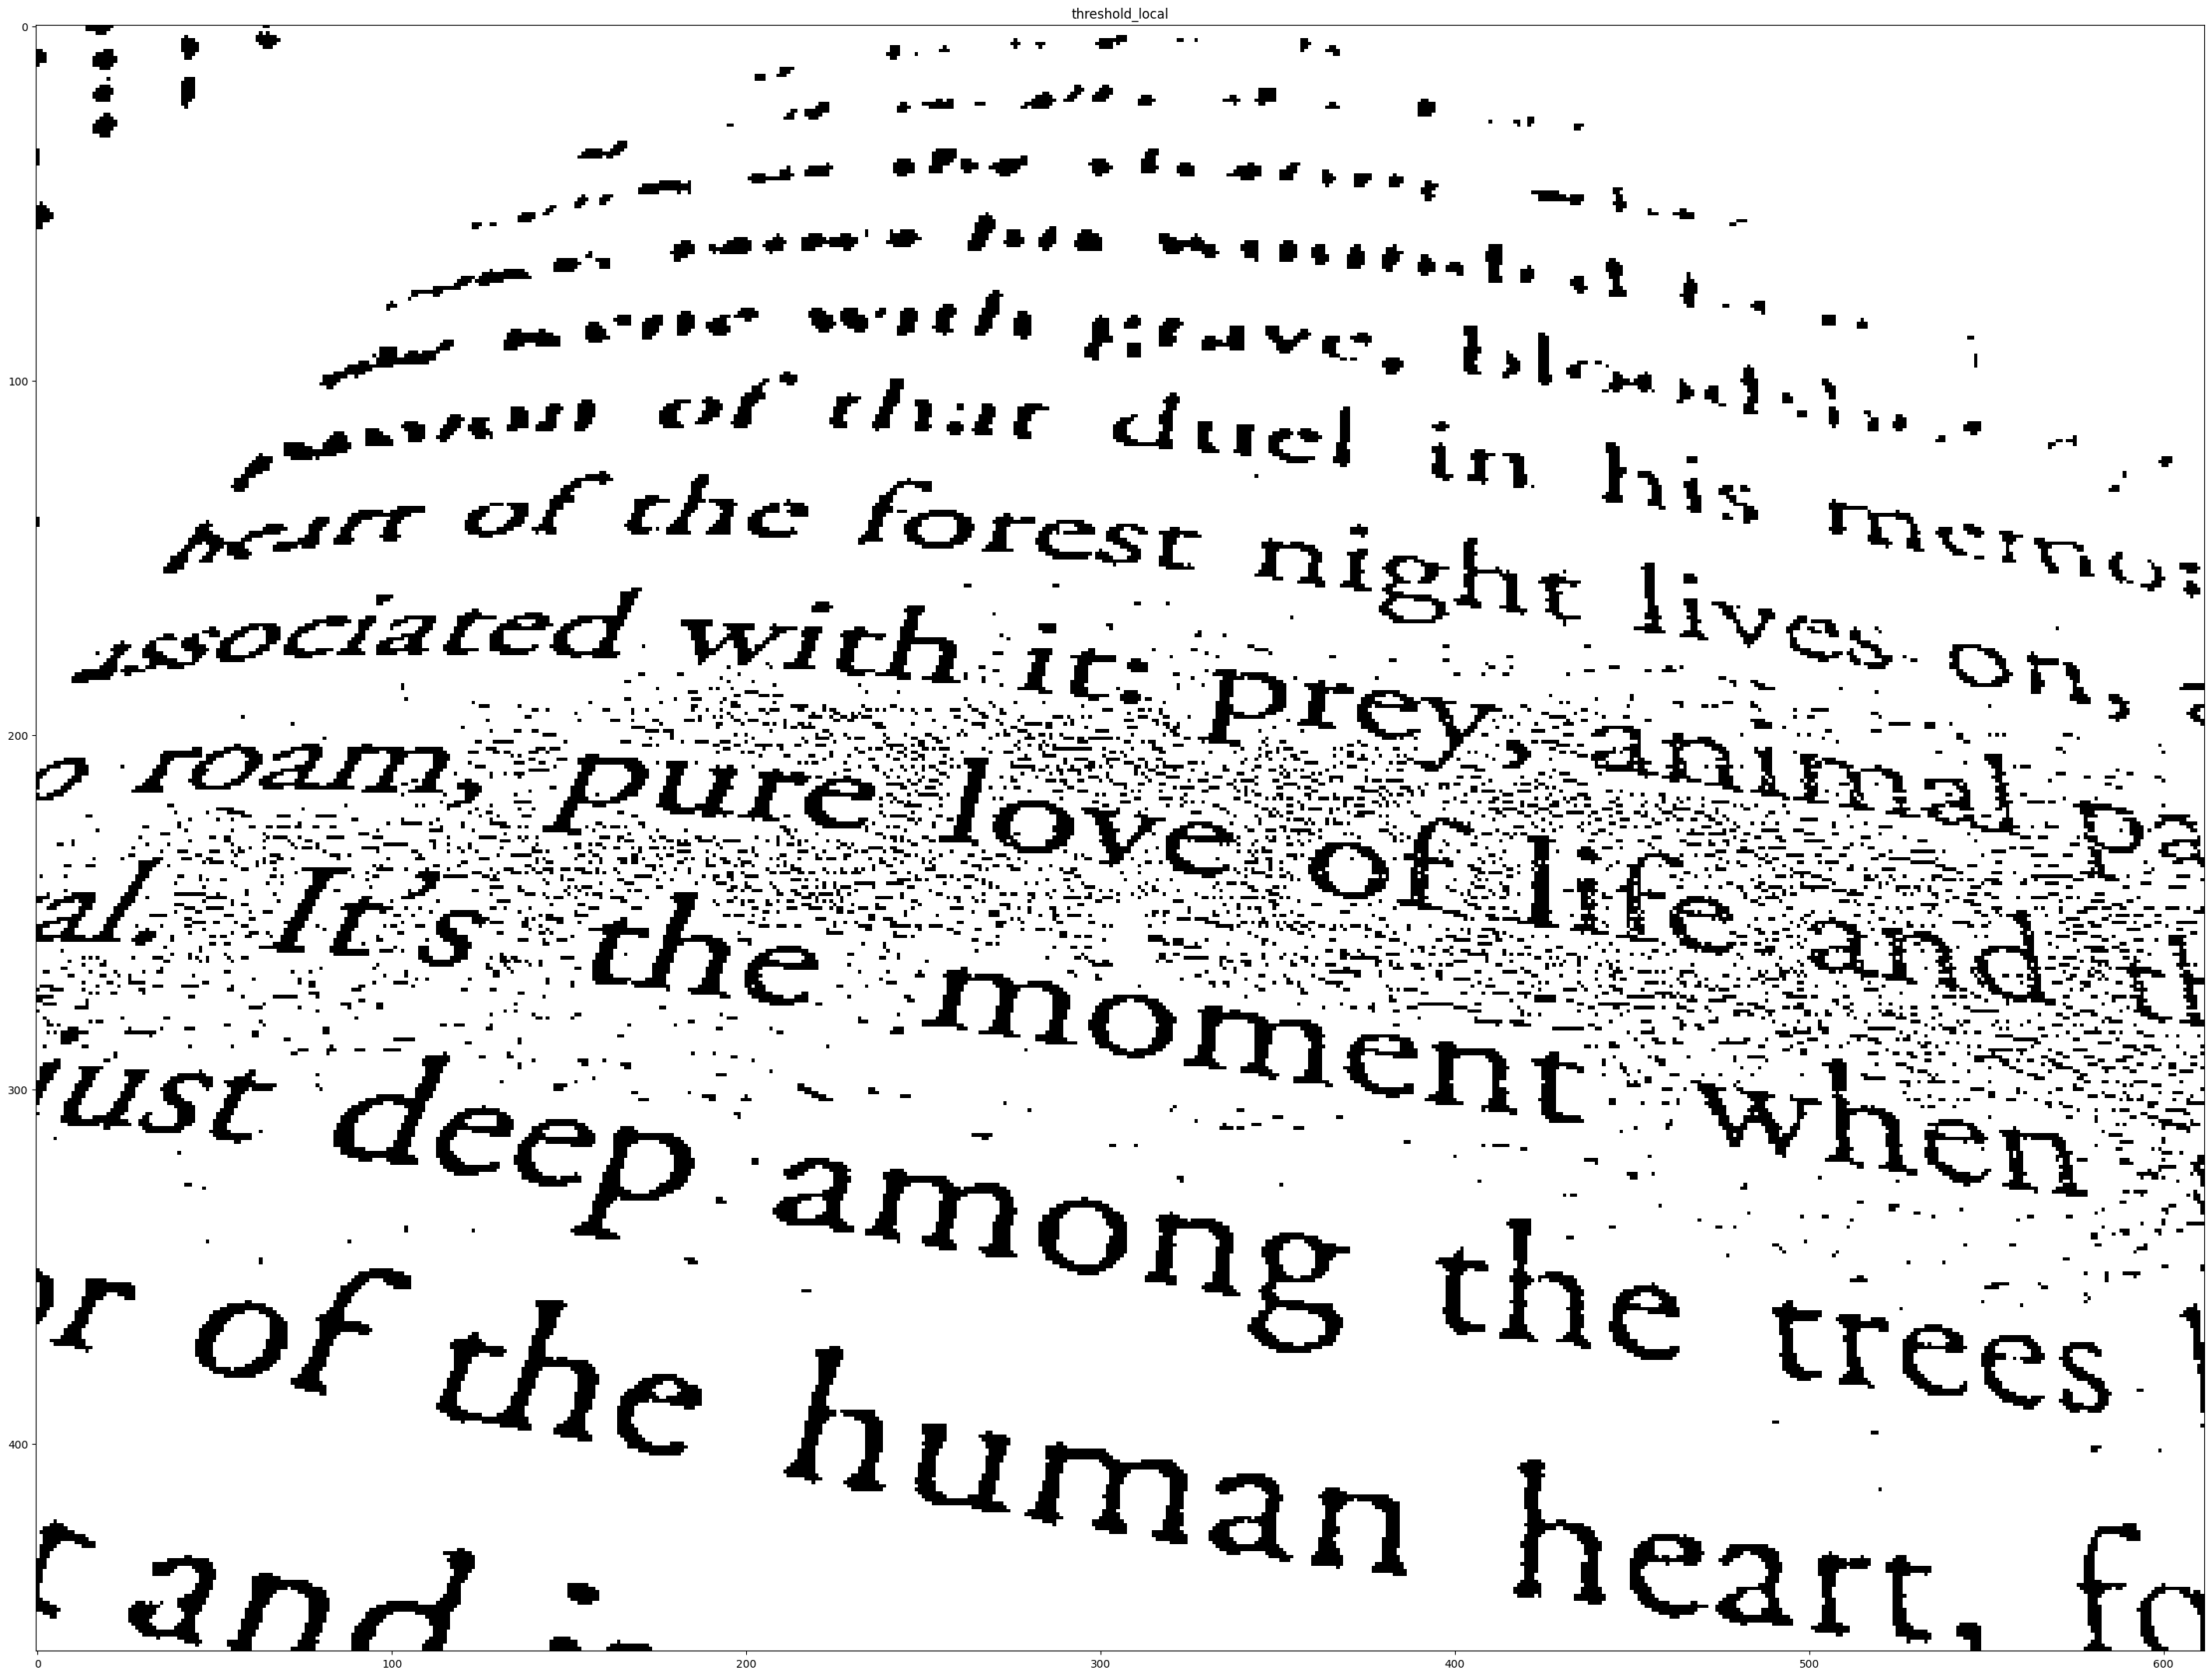

PyTesseract Extracted:      

= wwaele Heaves bl
we 9 Of char duel in
as ’
0 ithe for
Lt
pet

pocialed 5
ASF

Hodayy,

his my

  
 

Teo;

 
   

 

Son



In [13]:
from skimage.filters import threshold_local

image4 = cv2.imread('/content/image4.jpg')
imshow("Input Image", image4, size = 48)

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image4, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [1]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2024-11-22 15:25:58--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2024-11-22 15:25:58--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.03s   

2024-11-22 15:25:58 (2.67 MB/s) - ‘Receipt-woolworth.jpg’ s

In [6]:
from skimage.filters import threshold_local
image = cv2.imread('Receipt-woolworth.jpg')

In [7]:
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

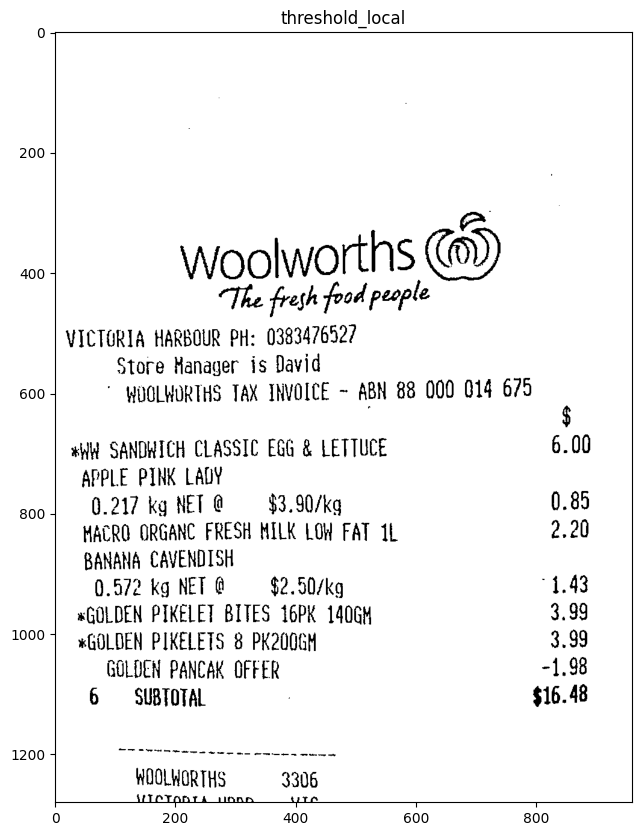

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [8]:
# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [9]:
from pytesseract import Output

# we can get the word detected, their bounding boxes , the text in it and confidence scores using this dict

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


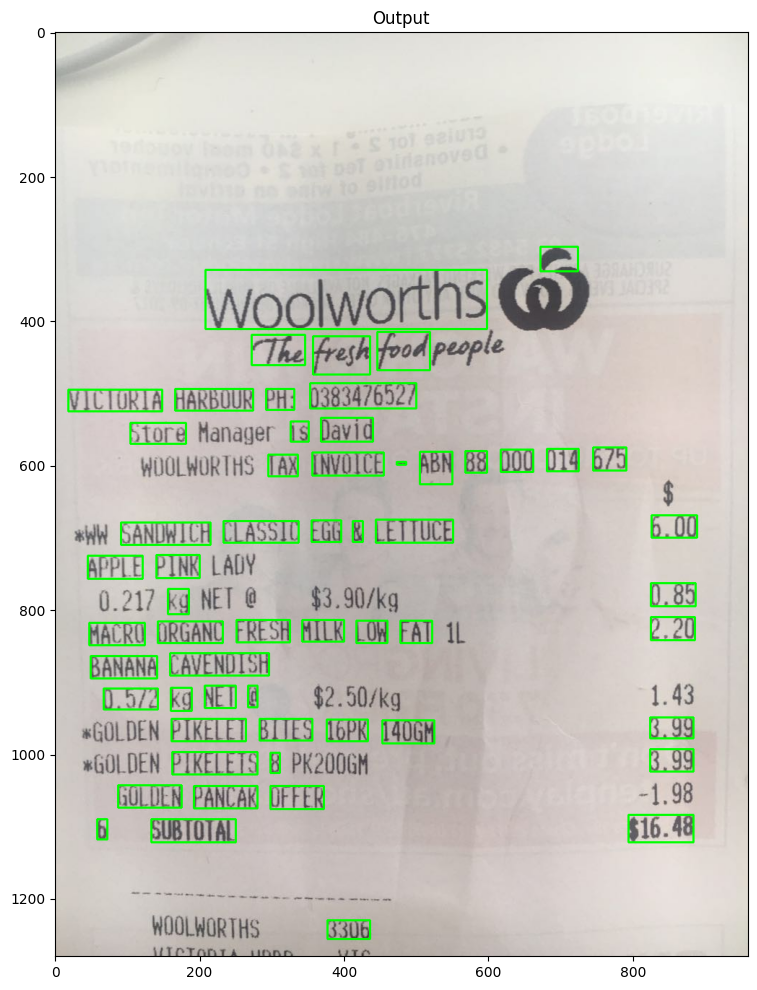

In [10]:
n_boxes = len(d['text'])

for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)